In [178]:
import requests
import bs4
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [20]:
# GET request (default)
url = "https://www.ebay.com/sch/i.html?_from=R40&_trksid=p2334524.m570.l1313&_nkw=clear+vinyl+gloves&_sacat=0&LH_TitleDesc=0&_osacat=0&_odkw=vinyl+gloves&LH_Complete=1&rt=nc&LH_Sold=1"
resp = requests.get(url)

In [21]:
soup = bs4.BeautifulSoup(resp.text)

In [22]:
soup

<!DOCTYPE html>
<!--[if IE 9]><html class="ie9 srp-ds6 srp-ds6-phase3" lang="en"><![endif]--><!--[if gt IE 9]><!--><html class="srp-ds6 srp-ds6-phase3" lang="en"><!--<![endif]--><!--M#s0-1--><body><noscript class="x-page-config" id="s0-1"></noscript><!--M/--><meta content="IE=edge" http-equiv="X-UA-Compatible"/><script>"use strict";if(window.PerformanceObserver&&performance&&performance.mark&&performance.getEntriesByName){window.SRP=window.SRP||{};var paintObserver=new window.PerformanceObserver(function(e){var r=e.getEntries();r.sort(function(e,r){return e.startTime-r.startTime});var n=r[1].startTime;window.SRP.TTI_TIMER={lastInteractiveWindow:n};var t=new window.PerformanceObserver(function(e){for(var r=e.getEntries(),i=0,a=r.length;i<a;i++)r[i].startTime-n>=5e3&&(window.SRP.TTI_TIMER.timeToInteract=n,t.disconnect()),n=r[i].startTime+r[i].duration,window.SRP.TTI_TIMER.lastInteractiveWindow=n});t.observe({entryTypes:["longtask"]}),paintObserver.disconnect()});paintObserver.observe({en

In [136]:
productName = soup.find_all("h3", attrs={'class': 's-item__title s-item__title--has-tags'})
productName

[<h3 class="s-item__title s-item__title--has-tags">General Purpose Clear Powder Free Vinyl Gloves Size Large Latex Free Box of 100</h3>,
 <h3 class="s-item__title s-item__title--has-tags">General Purpose Clear Powder Free Vinyl Gloves Extra Large Latex Free Box of 100</h3>,
 <h3 class="s-item__title s-item__title--has-tags">Gloves Vinyl Box of 100 L/XL L XL Powder Free Latex Free</h3>,
 <h3 class="s-item__title s-item__title--has-tags">Case of 1000 4 mil Durable, Clear, Powder-Free Vinyl Gloves</h3>,
 <h3 class="s-item__title s-item__title--has-tags"><span class="BOLD">100 Count✔ Clear Vinyl Latex-Free Gloves by Strong</span></h3>,
 <h3 class="s-item__title s-item__title--has-tags">100 PCS / 1000 PCS Vinyl Gloves Clear Powder Free NON Latex Gloves Size Medium</h3>,
 <h3 class="s-item__title s-item__title--has-tags"><span class="BOLD">200 Count✔ Clear Vinyl Gloves, Non-Latex , 3mil thick</span></h3>,
 <h3 class="s-item__title s-item__title--has-tags">100/500/1000 PCS PVC Vinyl Gloves Cl

In [134]:
items = soup.find_all("div", attrs={'class': 's-item__details clearfix'})
items

50

In [140]:
productName[0].text

'General Purpose Clear Powder Free Vinyl Gloves Size Large Latex Free Box of 100'

In [141]:
freeShip = []
payShip = {}
for i in range(0,len(items)):
    count = [int(word) for word in productName[i].text.split() if word.isdigit()]
    if len([*filter(lambda x: x == 100, count)]) > 0 and len(list(items[i].find('span').children)[0].attrs['class'])==1 and len(list(items[i].find('span').children))==1:
        if items[i].find_all('span', attrs={'class': 's-item__shipping s-item__logisticsCost'})[0].text == 'Free shipping':
            freeShip.append("%.2f"%float(items[i].find_all('span', attrs={'class': 'POSITIVE'})[0].text.replace('$',"")))
        else:
            shipCost = float(items[i].find_all('span', attrs={'class': 's-item__shipping s-item__logisticsCost'})[0].text.replace('$',"").replace("+","").replace(" shipping",""))
            if shipCost in payShip:
                payShip[shipCost].append("%.2f"%float(items[i].find_all('span', attrs={'class': 'POSITIVE'})[0].text.replace('$',"")))
            else :
                payShip[shipCost]=["%.2f"%float(items[i].find_all('span', attrs={'class': 'POSITIVE'})[0].text.replace('$',""))]

In [142]:
freeShip,payShip

(['14.99',
  '14.99',
  '14.50',
  '17.89',
  '4.99',
  '16.99',
  '16.99',
  '12.87',
  '18.99',
  '14.36',
  '14.99',
  '13.85',
  '16.99'],
 {7.99: ['6.99', '9.99']})

In [156]:
endDigits=[]
for i in freeShip:
    endDigits.append(i[-2:])
for i in payShip.values():
    for j in i:
        endDigits.append(j[-2:])
endDigits

['99',
 '99',
 '50',
 '89',
 '99',
 '99',
 '99',
 '87',
 '99',
 '36',
 '99',
 '85',
 '99',
 '99',
 '99']

In [157]:
frequency={}
for i in set(endDigits):
    frequency[i] = endDigits.count(i)

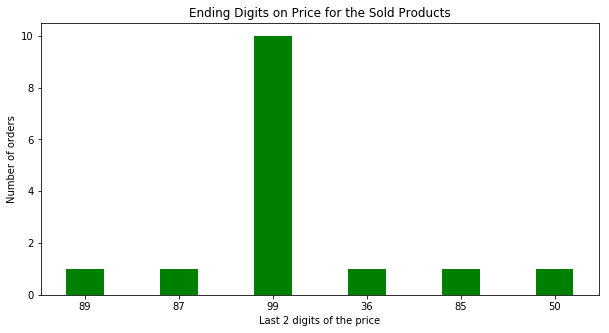

In [185]:
fig = plt.figure(figsize = (10, 5)) 
  
plt.bar(list(frequency.keys()), list(frequency.values()), color ='green',  
        width = 0.4) 
  
plt.xlabel("Last 2 digits of the price") 
plt.ylabel("Number of orders") 
plt.title("Ending Digits on Price for the Sold Products") 
plt.show() 

In [184]:
print("Mean price of the sold product with Free Shipping is: $"+"%.2f"%np.mean(list(map(float,freeShip))))

Mean price of the sold product with Free Shipping is: $14.88


In [186]:
def mode(s):
    c = Counter(s)
    return [i for i, j in c.items() if j == c.most_common(1)[0][1]]
mostCom = mode(list(map(float,freeShip)))
if len(mostCom)>1:
    print("Most common prices of sold product with Free Shipping are:", end=" ")
else :
    print("Most common price of sold product with Free Shipping is:", end=" ")
for i in range(len(mostCom)):
    if i != len(mostCom)-1:
        print("$"+"%.2f"%mostCom[i], end=" and ")
    else: 
        print("$"+"%.2f"%mostCom[i])

Most common prices of sold product with Free Shipping are: $14.99 and $16.99
